# Nisha Makwana - B01040428

# Case Study 2 : Data Mining in Yelp Data


Please download the Yelp dataset in Case Study 2 in BrightSpace. 

**Here is an example of the data format:**
### Business Objects

Business objects contain basic information about local businesses. The fields are as follows:

```json
{
  'type': 'business',
  'business_id': (a unique identifier for this business),
  'name': (the full business name),
  'neighborhoods': (a list of neighborhood names, might be empty),
  'full_address': (localized address),
  'city': (city),
  'state': (state),
  'latitude': (latitude),
  'longitude': (longitude),
  'stars': (star rating, rounded to half-stars),
  'review_count': (review count),
  'photo_url': (photo url),
  'categories': [(localized category names)]
  'open': (is the business still open for business?),
  'schools': (nearby universities),
  'url': (yelp url)
}
```
### Checkin Objects
```json
{
    'type': 'checkin',
    'business_id': (encrypted business id),
    'checkin_info': {
        '0-0': (number of checkins from 00:00 to 01:00 on all Sundays),
        '1-0': (number of checkins from 01:00 to 02:00 on all Sundays),
        ...
        '14-4': (number of checkins from 14:00 to 15:00 on all Thursdays),
        ...
        '23-6': (number of checkins from 23:00 to 00:00 on all Saturdays)
    }, # if there was no checkin for a hour-day block it will not be in the dict
}
```

# Problem: pick a data science problem that you plan to solve using Yelp Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using yelp data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

I want to create a model that predicts the success of businesses listed on Yelp. To do this, I'll analyze data such as reviews, ratings, and category. By looking at patterns in user behavior, business attributes, and check-ins, the model will estimate the chances of a business getting high ratings and attracting more customers.

# Data Collection/Processing: 

In [2]:
import pandas as pd

# file paths
business_file_path = "yelp_academic_dataset_business.json"
checkin_file_path = "yelp_academic_dataset_checkin.json"

# Retrieve business information and check-in data
business_df = pd.read_json(business_file_path, lines=True)
checkin_df = pd.read_json(checkin_file_path, lines=True)

#display data
print("Business Data:")
print(business_df.head())

print("\nCheckin Data:")
print(checkin_df.head())


Business Data:
              business_id                  name               neighborhood  \
0  Apn5Q_b6Nz61Tq4XzPdf9A  Minhas Micro Brewery                              
1  AjEbIBw6ZFfln7ePHha9PA   CK'S BBQ & Catering                              
2  O8S5hYJ1SMc8fA4QBtVujA         La Bastringue  Rosemont-La Petite-Patrie   
3  bFzdJJ3wp3PZssNEsyU23g       Geico Insurance                              
4  8USyCYqpScwiNEb58Bt6CA         Action Engine                              

               address       city state postal_code   latitude   longitude  \
0    1314 44 Avenue NE    Calgary    AB     T2E 6L6  51.091813 -114.031675   
1                       Henderson    NV       89002  35.960734 -114.939821   
2  1335 rue Beaubien E   Montréal    QC     H2G 1K7  45.540503  -73.599300   
3      211 W Monroe St    Phoenix    AZ       85003  33.449999 -112.076979   
4  2005 Alyth Place SE    Calgary    AB     T2H 0N5  51.035591 -114.027366   

   stars  review_count  is_open  \
0    4.0    

# Data Exploration: Exploring the Yelp Dataset

**(1) Finding the most popular business categories:** 
* print the top 10 most popular business categories in the dataset and their counts in a table (i.e., how many business objects in each category). Here we say a category is "popular" if there are many business objects in this category (such as 'restaurants').

In [3]:
# prepare Data for analysis.
categories_df = business_df['categories'].str.split(', ', expand=True).stack()

# Determine how many times each category occurs.
top_categories = categories_df.value_counts().head(10)

# table with the counts of the top ten most common business categories.
print("Top 10 Most Popular Business Categories: \n")
print(top_categories)


Top 10 Most Popular Business Categories: 

Restaurants         57173
Shopping            30231
Food                27118
Beauty & Spas       18967
Home Services       18634
Health & Medical    16157
Local Services      12906
Automotive          12656
Nightlife           12438
Bars                10853
Name: count, dtype: int64


**(2) Find the most popular business objects** 
* print the top 10 most popular business objects/IDs in the dataset and their counts (i.e., how many checkins in total for each business object).  Here we say a business object is "popular" if the business object attracts a large number of checkins from the users.

In [10]:
!pip install tabulate
from tabulate import tabulate

table_data = []
for index, row in top_business_ids.iterrows():
    table_data.append([row['business_id'], row['total_checkins']])

# Print the table
print("Top 10 Most Popular Business Objects/IDs:\n")
print(tabulate(table_data, headers=["Business ID", "Total Check-ins"], tablefmt="pretty"))

Top 10 Most Popular Business Objects/IDs:

+------------------------+-----------------+
|      Business ID       | Total Check-ins |
+------------------------+-----------------+
| jf67Z1pnwElRSXllpQHiJg |      77320      |
| hW0Ne_HTHEAgGF1rAdmR-g |      68711      |
| 3Q0QQPnHcJuX1DLCL9G9Cg |      29893      |
| AtjsjFzalWqJ7S9DUFQ4bw |      27356      |
| JpHE7yhMS5ehA9e8WG_ETg |      18208      |
| 34uJtlPnKicSaX1V8_tu1A |      18099      |
| eWPFXL1Bmu1ImtIa2Rqliw |      17671      |
| -7yF42k0CcJhtPw51oaOqQ |      17419      |
| z3SyT8blMIhsZNvKJgKcRA |      17161      |
| 2e2e7WgqU1BnpxmQL5jbfw |      16641      |
+------------------------+-----------------+


**(3) Other explorations you would like to present** 


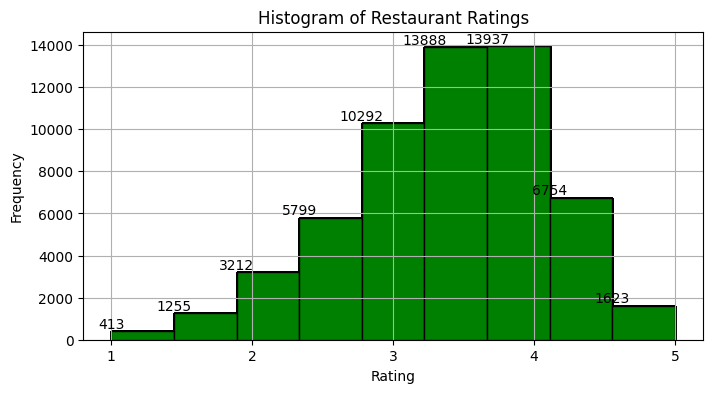

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the business data 
business_df = pd.read_json("yelp_academic_dataset_business.json", lines=True)

# Filter the restaurants
restaurant_df = business_df[business_df['categories'].str.contains('Restaurants', case=False, na=False)]

# Plot restaurant rating 
plt.figure(figsize=(8, 4))
plt.hist(restaurant_df['stars'], bins=9, color='green', edgecolor='black')
plt.title('Histogram of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(True)

#loop for generating bar
for i in range(len(plt.hist(restaurant_df['stars'], bins=9, color='green', edgecolor='black')[0])):
    plt.text(plt.hist(restaurant_df['stars'], bins=9, color='green', edgecolor='black')[1][i], 
             plt.hist(restaurant_df['stars'], bins=9, color='green', edgecolor='black')[0][i], 
             str(int(plt.hist(restaurant_df['stars'], bins=9, color='green', edgecolor='black')[0][i])), 
             ha='center', va='bottom')

plt.show()


# The Solution: implement a data science solution to the problem you are trying to solve.
Briefly describe the idea of your solution to the problem in the following cell:

- The plan is to use machine learning to predict how well businesses, especially restaurants on Yelp, will do.
- First, we'll get the data ready by fixing any missing info and picking out important features like reviews, ratings, and location.
- Then, we'll train a model called RandomForestClassifier on the training data and check how accurate it is using numbers like accuracy and F1 score.
- We'll also look at precision and recall to see how good the model is at guessing successful businesses.
- In short, we're making a tool to guess if a business will do well on Yelp based on different factors.

Write codes to implement the solution in python:

In [13]:
# Preprocess the data by removing unnecessary columns, dealing with null values.
business_df.dropna(inplace=True)
business_df.reset_index(drop=True, inplace=True)

In [14]:
# Extract features from the data
X = business_df[['review_count', 'stars', 'latitude', 'longitude']]

# Use 'is_open' as the target variable.
y = business_df['is_open']  

In [15]:
# Model Training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Divide the data into sets for testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Set the Random Forest Classifier to start.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
#Evaluation of the Model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Utilizing the test set, make predictions.
y_pred = rf_classifier.predict(X_test)

# Examine the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8338106634234376
F1 Score: 0.9084385267162373
Precision: 0.852979379769443
Recall: 0.9716108747919364


# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


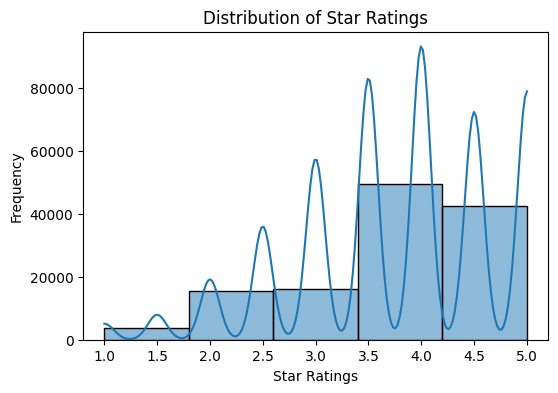

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, PrecisionRecallDisplay

# Distribution of Ratings
plt.figure(figsize=(6, 4))
sns.histplot(data=business_df, x='stars', bins=5, kde=True)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Frequency')
plt.show()

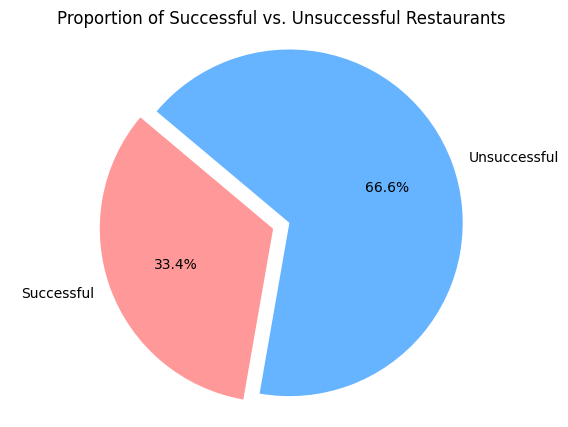

In [21]:
# successful_count criteria
successful_count = len(business_df[business_df['stars'] > 4])

# Calculate unsuccessful count
total_count = len(business_df)
unsuccessful_count = total_count - successful_count

# Visualize the proportion of successful vs. unsuccessful restaurants
labels = ['Successful', 'Unsuccessful']
sizes = [successful_count, unsuccessful_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0) 

plt.figure(figsize=(7, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Successful vs. Unsuccessful Restaurants')
plt.axis('equal') 
plt.show()

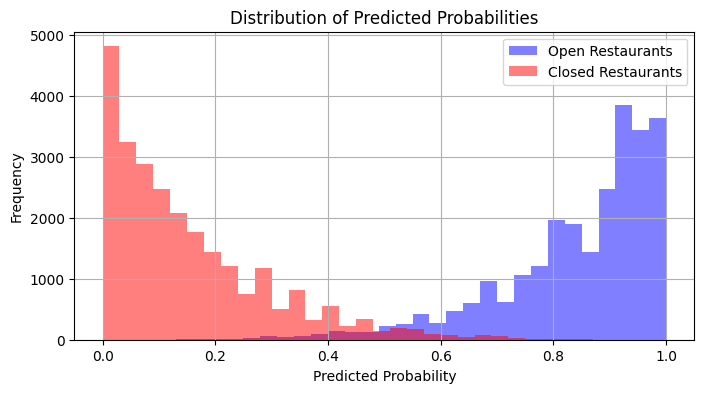

In [25]:
# predicted probabilities
y_pred_prob = rf_classifier.predict_proba(X_test)

# predicted probabilities for the positive class (open restaurants)
open_probs = y_pred_prob[:, 1]

# predicted probabilities for the negative class (closed restaurants)
closed_probs = y_pred_prob[:, 0]

# Plot histograms
plt.figure(figsize=(8, 4))

plt.hist(open_probs, bins=30, alpha=0.5, color='blue', label='Open Restaurants')
plt.hist(closed_probs, bins=30, alpha=0.5, color='red', label='Closed Restaurants')

plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. Please make sure all the plotted tables and figures are in the notebook. 